<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Cluestering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster with K-Means

dataset link: https://www.kaggle.com/weinoose/my-favorite-song-database

In [82]:
# imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
import pylab as pl

In [16]:
# import dataset
data = pd.read_excel('/content/drive/MyDrive/Datasets/data.xlsx')

In [17]:
# reading the 5 first lines
data.head()

,SONG,ARTIST,GENRE,ALBUM,ALBUM DATE,LENGTH,POPULARITY,DANCE,ENERGY,HAPPY,SPEECH,ACOUSTIC,INSTRUMENTAL,LIVE,LOUD,TEMP,KEY,CAMELOT,TIME SIGNATURE,ID
0,Kryptonite,3 Doors Down,Alternative Rock,The Better Life,2000,3:53,82,55,87,54,3,1,0,17,-6 db,99,B Minor,10A,4,6ZOBP3NvffbU4SZcrnt1k6
1,Flying,Anathema,Progressive Doom,Hindsight,2008-08-25,6:27,33,25,55,5,3,13,0,13,-8 db,145,C Minor,5A,3,4LknIoUqp497nUCdcd6nRs
2,One Last Goodbye,Anathema,Progressive Doom,Hindsight,2008-08-25,6:03,31,38,23,10,3,76,0,9,-8 db,100,B Minor,10A,3,1jUsNXxk8rz82nUYPnsGla
3,Velvet Goldmine,David Bowie,Glam Rock,Five Years,2015-09-25,3:10,42,62,63,89,3,64,0,16,-12 db,94,F Major,7B,4,6GCNEAIZVH4lKQD30lfQ6f
4,Without Me,Eminem,Hip-Hop,The Eminem Show,2002-05-26,4:50,93,91,67,66,7,0,0,24,-3 db,112,G Major,9B,4,7lQ8MOhq6IN2w8EYcFNSUk


In [18]:
# checking null data
data.isnull().sum()

SONG              0
ARTIST            0
GENRE             0
ALBUM             0
ALBUM DATE        0
LENGTH            0
POPULARITY        0
DANCE             0
ENERGY            0
HAPPY             0
SPEECH            0
ACOUSTIC          0
INSTRUMENTAL      0
LIVE              0
LOUD              0
TEMP              0
KEY               0
CAMELOT           0
TIME SIGNATURE    0
ID                0
dtype: int64

In [19]:
# checking duplicated data
data.duplicated().sum()

0

In [20]:
# visualizing dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SONG            50 non-null     object
 1   ARTIST          50 non-null     object
 2   GENRE           50 non-null     object
 3   ALBUM           50 non-null     object
 4   ALBUM DATE      50 non-null     object
 5   LENGTH          50 non-null     object
 6   POPULARITY      50 non-null     int64 
 7   DANCE           50 non-null     int64 
 8   ENERGY          50 non-null     int64 
 9   HAPPY           50 non-null     int64 
 10  SPEECH          50 non-null     int64 
 11  ACOUSTIC        50 non-null     int64 
 12  INSTRUMENTAL    50 non-null     int64 
 13  LIVE            50 non-null     int64 
 14  LOUD            50 non-null     object
 15  TEMP            50 non-null     int64 
 16  KEY             50 non-null     object
 17  CAMELOT         50 non-null     object
 18  TIME SIGNATU

In [21]:
# call columns function
data.columns

Index(['SONG', 'ARTIST', 'GENRE', 'ALBUM', 'ALBUM DATE', 'LENGTH',
       'POPULARITY', 'DANCE', 'ENERGY', 'HAPPY', 'SPEECH', 'ACOUSTIC',
       'INSTRUMENTAL', 'LIVE', 'LOUD', 'TEMP', 'KEY', 'CAMELOT',
       'TIME SIGNATURE', 'ID'],
      dtype='object')

In [22]:
# creating a new dataset with important columns
dataset = data[['ARTIST', 'GENRE', 'LENGTH', 'POPULARITY', 'DANCE', 'ENERGY',
                'HAPPY', 'SPEECH', 'ACOUSTIC', 'INSTRUMENTAL', 'LIVE', 'TEMP']]

In [23]:
# checking a new dataset
dataset.head()

,ARTIST,GENRE,LENGTH,POPULARITY,DANCE,ENERGY,HAPPY,SPEECH,ACOUSTIC,INSTRUMENTAL,LIVE,TEMP
0,3 Doors Down,Alternative Rock,3:53,82,55,87,54,3,1,0,17,99
1,Anathema,Progressive Doom,6:27,33,25,55,5,3,13,0,13,145
2,Anathema,Progressive Doom,6:03,31,38,23,10,3,76,0,9,100
3,David Bowie,Glam Rock,3:10,42,62,63,89,3,64,0,16,94
4,Eminem,Hip-Hop,4:50,93,91,67,66,7,0,0,24,112


In [40]:
# converting time in seconds (float)
total_seconds = []
for d in dataset.LENGTH:
    minutos, segundo = map(float, d.split(':'))
    total = (minutos * 60) + segundo
    total_seconds.append(total)
print(total_seconds)
type(total_seconds)

[233.0, 387.0, 363.0, 190.0, 290.0, 284.0, 297.0, 210.0, 363.0, 250.0, 536.0, 334.0, 234.0, 283.0, 241.0, 409.0, 257.0, 271.0, 215.0, 203.0, 231.0, 257.0, 314.0, 388.0, 386.0, 304.0, 417.0, 414.0, 204.0, 232.0, 218.0, 293.0, 353.0, 220.0, 354.0, 271.0, 290.0, 290.0, 403.0, 358.0, 270.0, 267.0, 367.0, 397.0, 306.0, 257.0, 221.0, 223.0, 219.0, 185.0]


list

In [41]:
# include new column in dataset
dataset['new_length'] = total_seconds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
# checking new dataset with new columns
dataset.head()

,ARTIST,GENRE,LENGTH,POPULARITY,DANCE,ENERGY,HAPPY,SPEECH,ACOUSTIC,INSTRUMENTAL,LIVE,TEMP,new_length
0,3 Doors Down,Alternative Rock,3:53,82,55,87,54,3,1,0,17,99,233.0
1,Anathema,Progressive Doom,6:27,33,25,55,5,3,13,0,13,145,387.0
2,Anathema,Progressive Doom,6:03,31,38,23,10,3,76,0,9,100,363.0
3,David Bowie,Glam Rock,3:10,42,62,63,89,3,64,0,16,94,190.0
4,Eminem,Hip-Hop,4:50,93,91,67,66,7,0,0,24,112,290.0


In [43]:
# droping old column 'LENGTH'
dataset = dataset.drop('LENGTH', axis=1)
dataset.head()

,ARTIST,GENRE,POPULARITY,DANCE,ENERGY,HAPPY,SPEECH,ACOUSTIC,INSTRUMENTAL,LIVE,TEMP,new_length
0,3 Doors Down,Alternative Rock,82,55,87,54,3,1,0,17,99,233.0
1,Anathema,Progressive Doom,33,25,55,5,3,13,0,13,145,387.0
2,Anathema,Progressive Doom,31,38,23,10,3,76,0,9,100,363.0
3,David Bowie,Glam Rock,42,62,63,89,3,64,0,16,94,190.0
4,Eminem,Hip-Hop,93,91,67,66,7,0,0,24,112,290.0


In [48]:
# transform data categorical in numeric by LabelEncoder
lb = LabelEncoder()

dataset.ARTIST = lb.fit_transform(dataset.ARTIST)
dataset.GENRE = lb.fit_transform(dataset.GENRE)

In [49]:
# Checking new value transfomated column 
dataset.head()

,ARTIST,GENRE,POPULARITY,DANCE,ENERGY,HAPPY,SPEECH,ACOUSTIC,INSTRUMENTAL,LIVE,TEMP,new_length
0,0,0,82,55,87,54,3,1,0,17,99,233.0
1,1,20,33,25,55,5,3,13,0,13,145,387.0
2,1,20,31,38,23,10,3,76,0,9,100,363.0
3,2,7,42,62,63,89,3,64,0,16,94,190.0
4,3,11,93,91,67,66,7,0,0,24,112,290.0


In [51]:
# checking on more time the informatio about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ARTIST        50 non-null     int64  
 1   GENRE         50 non-null     int64  
 2   POPULARITY    50 non-null     int64  
 3   DANCE         50 non-null     int64  
 4   ENERGY        50 non-null     int64  
 5   HAPPY         50 non-null     int64  
 6   SPEECH        50 non-null     int64  
 7   ACOUSTIC      50 non-null     int64  
 8   INSTRUMENTAL  50 non-null     int64  
 9   LIVE          50 non-null     int64  
 10  TEMP          50 non-null     int64  
 11  new_length    50 non-null     float64
dtypes: float64(1), int64(11)
memory usage: 4.8 KB


In [74]:
# creating and fitting a model
kmeans = KMeans(n_clusters = 3, random_state = 111).fit(dataset)

In [75]:
# checking labels created
kmeans.labels_

array([2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 2, 2, 2], dtype=int32)

In [76]:
# creating a Cluster map and including in dataset
cm = pd.DataFrame(dataset)
cm['cluster'] = kmeans.labels_

In [77]:
cm.head()

,ARTIST,GENRE,POPULARITY,DANCE,ENERGY,HAPPY,SPEECH,ACOUSTIC,INSTRUMENTAL,LIVE,TEMP,new_length,cluster
0,0,0,82,55,87,54,3,1,0,17,99,233.0,2
1,1,20,33,25,55,5,3,13,0,13,145,387.0,1
2,1,20,31,38,23,10,3,76,0,9,100,363.0,1
3,2,7,42,62,63,89,3,64,0,16,94,190.0,2
4,3,11,93,91,67,66,7,0,0,24,112,290.0,0


In [78]:
# reducing dimensionality
pca = PCA(n_components = 2).fit(dataset)

In [79]:
# applying dimensonality
pca_2d = pca.transform(dataset)

In [80]:
pca_2d.shape

(50, 2)

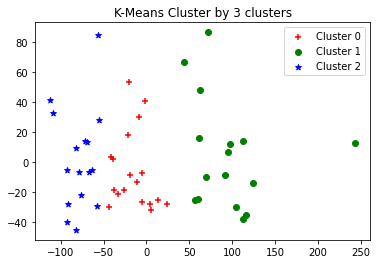

In [81]:
# generating 'labels' to clusters results
for i in range(0, pca_2d.shape[0]):
  if kmeans.labels_[i] == 0:
    c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
  elif kmeans.labels_[i] == 1:
    c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
  elif kmeans.labels_[i] == 2:
    c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
    pl.legend([c1,c2,c3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
    pl.title("K-Means Cluster by 3 clusters")
pl.show()

In [95]:
dataset_2 = dataset[['GENRE', 'POPULARITY']]
dataset_2.head()

,GENRE,POPULARITY
0,0,82
1,20,33
2,20,31
3,7,42
4,11,93


In [98]:
# creating and fitting a model
kmeans = KMeans(n_clusters = 4, random_state = 111).fit(dataset_2)

In [99]:
# checking labels created
kmeans.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 3, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 3, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 0, 1, 1, 1, 1,
       0, 3, 2, 3, 2, 0], dtype=int32)

In [102]:
# creating a Cluster map and including in dataset
cm2 = pd.DataFrame(dataset_2)
cm2['cluster'] = kmeans.labels_

In [103]:
cm2.head()

,GENRE,POPULARITY,cluster
0,0,82,2
1,20,33,3
2,20,31,3
3,7,42,3
4,11,93,2


In [107]:
# reducing dimensionality
pca_2 = PCA(n_components = 2).fit(dataset_2)

In [108]:
# applying dimensonality
pca_2d_2 = pca_2.transform(dataset_2)

In [109]:
pca_2d_2.shape

(50, 2)

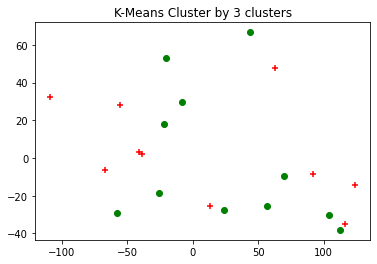

In [110]:
# generating 'labels' to clusters results
for i in range(0, pca_2d.shape[0]):
  if kmeans.labels_[i] == 0:
    c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
  elif kmeans.labels_[i] == 1:
    c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
  # elif kmeans.labels_[i] == 2:
  #   c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
    # pl.legend([c1,c2,c3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
    pl.title("K-Means Cluster by 3 clusters")
pl.show()